**Initial Cleaning (Removing HTML tags, punctuation, and special characters. Decoding the encoded text)**

In [ ]:
import pandas as pd
import re
import string

## Definging the function to do the initial cleaning
def clean_text(text):
    # Ensure the text is in string format
    if isinstance(text, bytes):
        text = text.decode('ascii', errors='ignore')
    else:
        text = text.encode('ascii', errors='ignore').decode('ascii')

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove punctuation and special characters
    text = ''.join([char for char in text if char not in string.punctuation])

    # Convert text to lowercase
    text = text.lower()

    return text

def main():
    file_path = '/content/A_II_Emotion_Data_Student_Copy_Final.xlsx'
    data = pd.read_excel(file_path)

    # Apply the cleaning function to the 'text_reviews_' column
    data['cleaned_text_reviews'] = data['text_reviews_'].apply(clean_text)

    # Save the cleaned data back to an Excel file
    output_file_path = 'Cleaned_Data.xlsx'  # Replace with your desired output file path
    data.to_excel(output_file_path, index=False)

    print("Data cleaning completed and saved to:", output_file_path)

if __name__ == "__main__":
    main()


Data cleaning completed and saved to: Cleaned_Data.xlsx


**Language Detection And Translation**

In [ ]:
!pip install googletrans==4.0.0-rc1
!pip install googletrans
!pip install langdetect

from googletrans import Translator, LANGUAGES
import pandas as pd
from googletrans import Translator, LANGUAGES
from collections import Counter
from langdetect import detect, DetectorFactory
from langdetect import detect, DetectorFactory

DetectorFactory.seed = 40

## Defining the function to detect any language other than english
def detect_language(text):
    try:
        return detect(text) if text.strip() else "Empty"
    except Exception as e:
        return "Unknown"

## Defining the function to translate any language other than English to English
def translate_text(text, lang):
    try:
        if lang != 'en' and text.strip():
            translator = Translator()
            translated = translator.translate(text, src=lang, dest='en')
            return translated.text
        return text
    except Exception as e:
        return text


def main():
    data = pd.read_excel('/content/Cleaned_Data.xlsx')

    if 'cleaned_text_reviews' in data.columns:
        # Apply language detection
        data['language'] = data['cleaned_text_reviews'].apply(detect_language)

        # Translate non-English reviews to English
        data['translated_text_reviews'] = data.apply(
            lambda row: translate_text(row['cleaned_text_reviews'], row['language']), axis=1)

        # Count frequencies of each language
        language_counts = Counter(data['language'])

        print("Detected languages and their counts:")
        for lang, count in language_counts.items():
            print(f"{lang}: {count}")

        # Optional: Save the translated data to an Excel file
        output_file_path = '/content/Translated_Cleaned_Data.xlsx'
        data.to_excel(output_file_path, index=False)
        print("Data translation completed and saved to:", output_file_path)

    else:
        print("The specified column does not exist in the data.")

if __name__ == "__main__":
    main()


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=2e582b5d9f54dda83de9649fa678b7c2ee952ccc671ce861a26582bdf0fbc557
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling c

**Cleaning again(step-1)**

In [ ]:
import pandas as pd
import re
import string

def clean_text(text):
    # Ensure the text is in string format
    if isinstance(text, bytes):
        text = text.decode('ascii', errors='ignore')
    else:
        text = text.encode('ascii', errors='ignore').decode('ascii')

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove punctuation and special characters
    text = ''.join([char for char in text if char not in string.punctuation])

    # Convert text to lowercase
    text = text.lower()

    return text

def main():
    file_path = '/content/Translated_Cleaned_Data.xlsx'
    data = pd.read_excel(file_path)

    # Apply the cleaning function to the 'text_reviews_' column
    data['cleanedd_text_reviews'] = data['translated_text_reviews'].apply(clean_text)

    # Save the cleaned data back to an Excel file
    output_file_path = 'Cleaned_Data.xlsx'  # Replace with your desired output file path
    data.to_excel(output_file_path, index=False)

    print("Data cleaning completed and saved to:", output_file_path)

if __name__ == "__main__":
    main()


Data cleaning completed and saved to: Cleaned_Data.xlsx


**Tokenization**

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

## Defining the tokenization function
def tokenize_text(text):
    # Tokenizes the input text using NLTK's word_tokenize
    tokens = word_tokenize(text)
    return tokens
## Uploading the data and applying the function the text data
def main():

    # Load the dataset
    data = pd.read_excel('/content/Cleaned_Data.xlsx', engine='openpyxl')

    # Check if the target column exists
    if 'cleaned_text_reviews' in data.columns:
        # Apply the tokenization function to the 'cleaned_text_reviews' column and save it to a new column 'token_reviews'
        data['token_reviews'] = data['cleanedd_text_reviews'].apply(tokenize_text)

        # Display the first few rows of the dataframe to verify tokenization
        print(data[['translated_text_reviews', 'token_reviews']].head())

        # Save the updated DataFrame back to an Excel file
        data.to_excel('/content/Updated_Cleaned_Data.xlsx', index=False)
        print("Data has been saved with the new 'token_reviews' column.")
    else:
        print("The specified column 'cleaned_text_reviews' does not exist in the dataset.")

if __name__ == "__main__":
    main()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                             translated_text_reviews  \
0  fast shipping all cloths was finally fits well...   
1  just wanted to say how delighted i was with th...   
2  my order took 6 days with a snow day and a wee...   
3  wouldnt give them no stars i ordered a coat 4 ...   
4  parcel never arrived chasing for a refund for ...   

                                       token_reviews  
0  [fast, shipping, all, cloths, was, finally, fi...  
1  [just, wanted, to, say, how, delighted, i, was...  
2  [my, order, took, 6, days, with, a, snow, day,...  
3  [wouldnt, give, them, no, stars, i, ordered, a...  
4  [parcel, never, arrived, chasing, for, a, refu...  
Data has been saved with the new 'token_reviews' column.


**`Stop Word Removal`**

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

## Defining function for stop word removal
def remove_stopwords(text):
    if not isinstance(text, str):
        text = str(text)

    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
## Uploading the data and applying the function the text data
def main():
    # Load the dataset
    data = pd.read_excel('/content/Updated_Cleaned_Data.xlsx', engine='openpyxl')

    # Check if the target column exists
    if 'token_reviews' in data.columns:
        # Apply the stopword removal function to the 'cleaned_text_reviews' column
        data['Stop_reviews'] = data['token_reviews'].apply(remove_stopwords)

        # Display the first few rows of the dataframe to verify stopword removal
        print(data[['token_reviews', 'Stop_reviews']].head())
         # Save the updated DataFrame back to an Excel file
        data.to_excel('/content/Stop_Cleaned_Data.xlsx', index=False)

    else:
        print("The specified column 'cleaned_text_reviews' does not exist in the dataset.")


if __name__ == "__main__":
    main()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                       token_reviews  \
0  ['fast', 'shipping', 'all', 'cloths', 'was', '...   
1  ['just', 'wanted', 'to', 'say', 'how', 'deligh...   
2  ['my', 'order', 'took', '6', 'days', 'with', '...   
3  ['wouldnt', 'give', 'them', 'no', 'stars', 'i'...   
4  ['parcel', 'never', 'arrived', 'chasing', 'for...   

                                        Stop_reviews  
0  [ 'fast ' , 'shipping ' , 'all ' , 'cloths ' ,...  
1  [ 'just ' , 'wanted ' , 'to ' , 'say ' , 'how ...  
2  [ 'my ' , 'order ' , 'took ' , ' 6 ' , 'days '...  
3  [ 'wouldnt ' , 'give ' , 'them ' , 'no ' , 'st...  
4  [ 'parcel ' , 'never ' , 'arrived ' , 'chasing...  


**Lemmatisation**

In [ ]:
import pandas as pd
import spacy
import ast  # To convert string representation of lists to actual list

# Load the data
data = pd.read_excel('/content/Stop_Cleaned_Data.xlsx')

# Initialize spacy
nlp = spacy.load("en_core_web_sm")

# Function to process the reviews
def process_reviews(review):
    # Convert the string representation of list into actual list
    words = ast.literal_eval(review)

    # Lemmatization (join words to form proper sentences as context is important for lemmatization)
    lemmatized_sentence = " ".join(words).strip()
    doc = nlp(lemmatized_sentence)
    lemmatized_words = [token.lemma_ for token in doc]

    return lemmatized_words

# Apply the function to the Stop_reviews column
data['lemmatized_reviews'] = data['Stop_reviews'].apply(process_reviews)

# View the processed data
print(data['lemmatized_reviews'].head())

# Save the updated DataFrame back to an Excel file
output_path = '/content/processed_Stop_reviews.xlsx'  # Specify your desired output file path
data.to_excel(output_path, index=False)


Exception ignored in: <function _xla_gc_callback at 0x7b0119df29e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


FileNotFoundError: [Errno 2] No such file or directory: 'lemmatized_reviews'

**Predicting Star Rating**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
data = pd.read_excel('/content/processed_Stop_reviews.xlsx')
# Drop rows with NaN values in 'emotions_'
data_labeled = data.dropna(subset=['emotions_'])

# Select features and labels
X = data_labeled['lemmatized_reviews']  # Using cleaned text reviews
y = data_labeled['emotions_']

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Limit to 1000 features for simplicity

# Fit and transform the text data to create feature vectors
X_vectorized = vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression classifier
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)  # Increased max_iter for convergence
log_reg_model.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = log_reg_model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.4523809523809524
Classification Report:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00         7
     disgust       0.17      0.23      0.19        13
        fear       0.38      0.19      0.25        16
         joy       0.83      0.83      0.83        23
     neutral       0.56      0.43      0.49        21
     sadness       0.40      0.42      0.41        24
    surprise       0.37      0.59      0.46        22

    accuracy                           0.45       126
   macro avg       0.39      0.38      0.37       126
weighted avg       0.45      0.45      0.44       126



**ANN for prediction**

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load data
data = pd.read_excel('/content/processed_Stop_reviews.xlsx')

# Remove rows where emotions are NaN
data = data.dropna(subset=['emotions_'])

# Prepare data
X = data['lemmatized_reviews'].astype(str)  # Ensure all entries are string type
y = data['emotions_']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(np.unique(y_encoded))  # Number of unique emotion labels

# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=100)  # Ensure all sequences have the same length

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_encoded, test_size=0.2, random_state=40423910)

# Build the model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=50, input_length=100))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Adjust the number of output nodes to match num_classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch 1/5
15/15 [==============================] - 1s 35ms/step - loss: 1.9056 - accuracy: 0.2067 - val_loss: 1.8970 - val_accuracy: 0.2353
Epoch 2/5
15/15 [==============================] - 0s 19ms/step - loss: 1.8043 - accuracy: 0.2933 - val_loss: 1.9136 - val_accuracy: 0.2549
Epoch 3/5
15/15 [==============================] - 0s 19ms/step - loss: 1.7095 - accuracy: 0.3622 - val_loss: 1.9364 - val_accuracy: 0.2353
Epoch 4/5
15/15 [==============================] - 0s 19ms/step - loss: 1.5582 - accuracy: 0.4844 - val_loss: 1.9147 - val_accuracy: 0.2157
Epoch 5/5
4/4 [==============================] - 0s 8ms/step - loss: 1.8603 - accuracy: 0.2143
Test Accuracy: 21.43%


**SVM**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, accuracy_score
# Load data
data = pd.read_excel('/content/processed_Stop_reviews.xlsx')



# Drop rows with NaN values in 'emotions_'
data_labeled = data.dropna(subset=['emotions_'])

# Select features and labels
X = data_labeled['lemmatized_reviews']  # Using cleaned text reviews
y = data_labeled['emotions_']

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Limit to 1000 features for simplicity

# Fit and transform the text data to create feature vectors
X_vectorized = vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


(0.5,
 '              precision    recall  f1-score   support\n\n       anger       0.00      0.00      0.00         7\n     disgust       0.22      0.38      0.28        13\n        fear       0.56      0.31      0.40        16\n         joy       0.83      0.87      0.85        23\n     neutral       0.69      0.43      0.53        21\n     sadness       0.42      0.46      0.44        24\n    surprise       0.45      0.59      0.51        22\n\n    accuracy                           0.50       126\n   macro avg       0.45      0.43      0.43       126\nweighted avg       0.52      0.50      0.50       126\n')

**RF**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Load data
data = pd.read_excel('/content/processed_Stop_reviews.xlsx')
# Drop rows with NaN values in 'emotions_'
data_labeled = data.dropna(subset=['emotions_'])

# Prepare data
X = data_labeled['lemmatized_reviews']  # Features
y = data_labeled['emotions_']           # Target

# Convert labels to numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=40423910)

# Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Model training with Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vect, y_train)

# Prediction and evaluation
y_pred = rf_model.predict(X_test_vect)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

       anger       0.44      0.33      0.38        12
     disgust       0.33      0.21      0.26        14
        fear       0.50      0.19      0.27        16
         joy       0.52      0.76      0.62        17
     neutral       0.61      0.61      0.61        28
     sadness       0.40      0.33      0.36        18
    surprise       0.38      0.62      0.47        21

    accuracy                           0.47       126
   macro avg       0.46      0.44      0.43       126
weighted avg       0.47      0.47      0.45       126



**Final model (SGDC And Self training)**

**SGDC And Self training**

Accuracy: 0.49206349206349204
Precision: 0.558746833566235
Recall: 0.49206349206349204
F1 Score: 0.5137145709802964


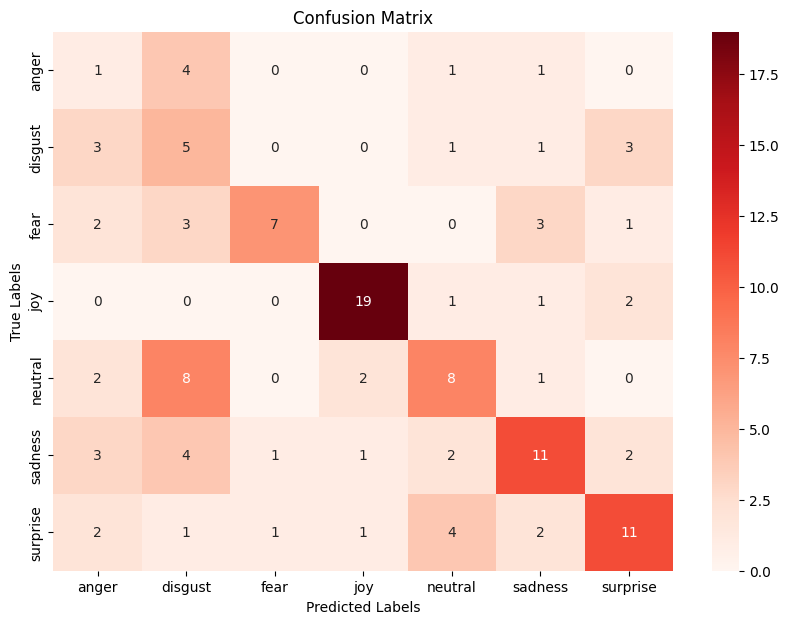

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

Semi-supervised Accuracy: 0.8571428571428571
Count of each emotion after semi-supervised learning:
joy         2680
neutral      923
surprise     639
sadness      499
disgust      471
fear         362
anger        148
Name: count, dtype: int64


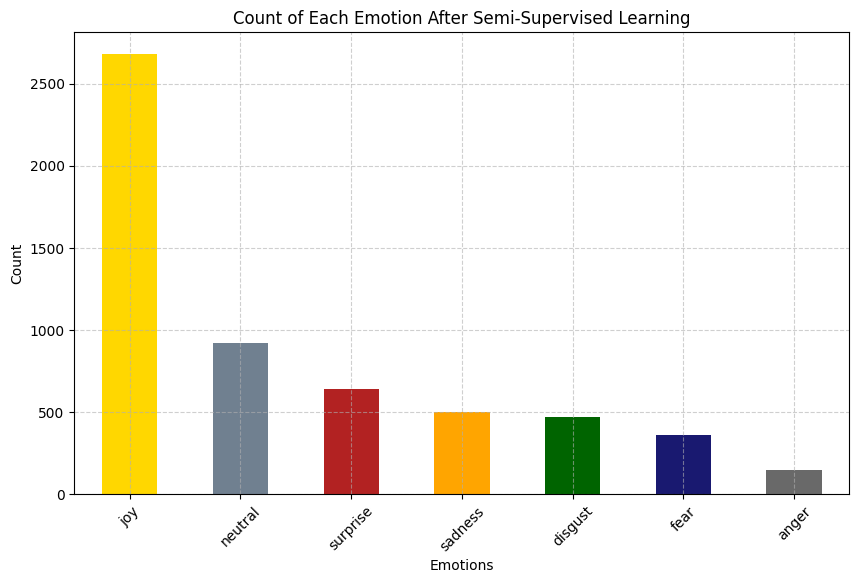

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.semi_supervised import SelfTrainingClassifier
import seaborn as sns

# Load the data from Excel
data = pd.read_excel('/content/processed_Stop_reviews (1).xlsx')

# Assuming 'lemmatized_reviews' are your features and 'emotions_' are your labels
X = data['lemmatized_reviews']
y = data['emotions_']

# Here, we assume 'unknown' is used for unlabeled data; adjust as necessary
y = y.replace({np.nan: None})


# Filter out the unlabeled data for supervised training
labeled_indices = y.notnull()
X_labeled = X[labeled_indices]
y_labeled = y[labeled_indices]

# Split the labeled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_labeled, test_size=0.2, random_state=42)

# Create a pipeline with text vectorization and a classifier
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Reds', xticklabels=np.unique(y_labeled), yticklabels=np.unique(y_labeled))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Initialize LabelEncoder
encoder = LabelEncoder()

# Temporarily replace NaNs with a placeholder string
y_filled = y.fillna('unlabeled')

# Fit encoder and transform labels including the placeholder
encoded_labels = encoder.fit_transform(y_filled)

# Replace 'unlabeled' encoded label with -1 (expected by SelfTrainingClassifier for unlabeled data)
encoded_labels[encoded_labels == encoder.transform(['unlabeled'])[0]] = -1


# Initialize LabelEncoder and encode labels, including NaN handling
encoder = LabelEncoder()
y_filled = y.fillna('unlabeled')
encoded_labels = encoder.fit_transform(y_filled)
encoded_labels[encoded_labels == encoder.transform(['unlabeled'])[0]] = -1  # Mark unlabeled data

# Convert features and labels into a DataFrame to keep them aligned
data_prepared = pd.DataFrame({
    'lemmatized_reviews': X,
    'encoded_emotions': encoded_labels
})

# Filter to get only labeled data for supervised evaluation
labeled_data = data_prepared[data_prepared['encoded_emotions'] != -1]

# Split labeled data for evaluation
X_train_eval, X_test_eval, y_train_eval, y_test_eval = train_test_split(
    labeled_data['lemmatized_reviews'], labeled_data['encoded_emotions'], test_size=0.2, random_state=42
)

# Split all data for semi-supervised training
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    data_prepared['lemmatized_reviews'], data_prepared['encoded_emotions'], test_size=0.2, random_state=42
)

# Define the pipeline for the semi-supervised model
semi_supervised_model = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('self_clf', SelfTrainingClassifier(SGDClassifier(loss='log', random_state=42), criterion='k_best', k_best=50))
])

# Train the semi-supervised model with all available data
semi_supervised_model.fit(X_train_full, y_train_full)

# Evaluate the semi-supervised model on the test set prepared from labeled data
semi_accuracy = semi_supervised_model.score(X_test_eval, y_test_eval)
print("Semi-supervised Accuracy:", semi_accuracy)
# Predict the labels on the entire dataset
full_predictions = semi_supervised_model.predict(data_prepared['lemmatized_reviews'])

# Decode the predicted labels
decoded_predictions = encoder.inverse_transform(full_predictions)

# Convert predictions to a DataFrame and count occurrences of each emotion
prediction_counts = pd.Series(decoded_predictions).value_counts()


# Add predicted labels to the DataFrame
data_prepared['predicted_emotions'] = decoded_predictions

# Concatenate the original DataFrame with the predicted emotions
result_data = pd.concat([data, data_prepared['predicted_emotions']], axis=1)

# Save the DataFrame with predicted emotions to a new Excel file
output_path = 'predicted_emotions.xlsx'  # Update this to your desired output file path
result_data.to_excel(output_path, index=False)


# Print the count of each emotion
print("Count of each emotion after semi-supervised learning:")
print(prediction_counts)
colors = ['gold', 'slategray', 'firebrick', 'orange', 'darkgreen', 'midnightblue', 'dimgray']

# Create the bar plot
plt.figure(figsize=(10, 6))
prediction_counts.plot(kind='bar', color=colors)
plt.title('Count of Each Emotion After Semi-Supervised Learning')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**RF And Self Training**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.semi_supervised import SelfTrainingClassifier
import numpy as np  # Ensure numpy is imported if you use np.nan

# Load the data from Excel
file_path = '/content/processed_Stop_reviews.xlsx'  # Change this to your actual file path
data = pd.read_excel(file_path)

# Assuming 'lemmatized_reviews' are your features and 'emotions_' are your labels
X = data['lemmatized_reviews']
y = data['emotions_']
# Replace the marker for unlabeled data with None or np.nan (if it's not already)
y = y.replace({'unknown': None})  # Adjust if necessary, originally np.nan which might already be the replacement

# Filter out the unlabeled data for supervised training
labeled_indices = y.notnull()
X_labeled = X[labeled_indices]
y_labeled = y[labeled_indices]

# Split the labeled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_labeled, test_size=0.2, random_state=42)

# Create a pipeline with text vectorization and a classifier
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
accuracy = pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)

# Semi-supervised code remains unchanged
# Initialize LabelEncoder and encode labels, including NaN handling
encoder = LabelEncoder()
y_filled = y.fillna('unlabeled')
encoded_labels = encoder.fit_transform(y_filled)
encoded_labels[encoded_labels == encoder.transform(['unlabeled'])[0]] = -1  # Mark unlabeled data

# Convert features and labels into a DataFrame to keep them aligned
data_prepared = pd.DataFrame({
    'lemmatized_reviews': X,
    'encoded_emotions': encoded_labels
})

# Filter to get only labeled data for supervised evaluation
labeled_data = data_prepared[data_prepared['encoded_emotions'] != -1]

# Split labeled data for evaluation
X_train_eval, X_test_eval, y_train_eval, y_test_eval = train_test_split(
    labeled_data['lemmatized_reviews'], labeled_data['encoded_emotions'], test_size=0.2, random_state=42
)

# Split all data for semi-supervised training
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    data_prepared['lemmatized_reviews'], data_prepared['encoded_emotions'], test_size=0.2, random_state=42
)

# Define the pipeline for the semi-supervised model
semi_supervised_model = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('self_clf', SelfTrainingClassifier(SGDClassifier(loss='log', random_state=42), criterion='k_best', k_best=50))
])

# Train the semi-supervised model with all available data
semi_supervised_model.fit(X_train_full, y_train_full)

# Evaluate the semi-supervised model on the test set prepared from labeled data
semi_accuracy = semi_supervised_model.score(X_test_eval, y_test_eval)
print("Semi-supervised Accuracy:", semi_accuracy)

# Predict the labels on the entire dataset
full_predictions = semi_supervised_model.predict(data_prepared['lemmatized_reviews'])

# Decode the predicted labels
decoded_predictions = encoder.inverse_transform(full_predictions)

# Convert predictions to a DataFrame and count occurrences of each emotion
prediction_counts = pd.Series(decoded_predictions).value_counts()

# Print the count of each emotion
print("Count of each emotion after semi-supervised learning:")
print(prediction_counts)

# Create the bar plot
colors = ['gold', 'slategray', 'firebrick', 'orange', 'darkgreen', 'midnightblue', 'dimgray']
plt.figure(figsize=(10, 6))
prediction_counts.plot(kind='bar', color=colors)
plt.title('Count of Each Emotion After Semi-Supervised Learning')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


**Visual analytics**

**Data Exploration**

<ipython-input-12-17bd64733436>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="viridis")


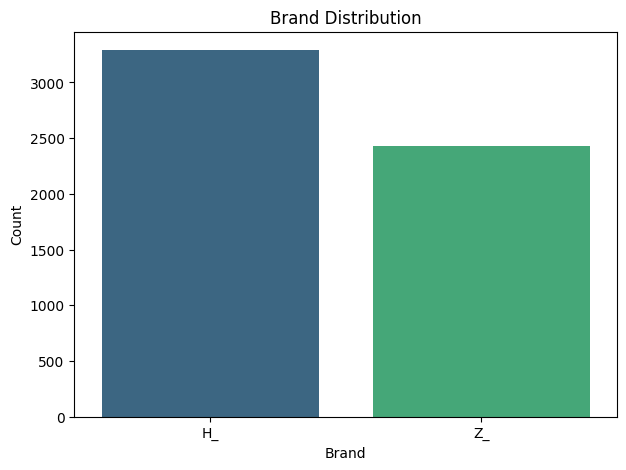

<Figure size 700x500 with 0 Axes>

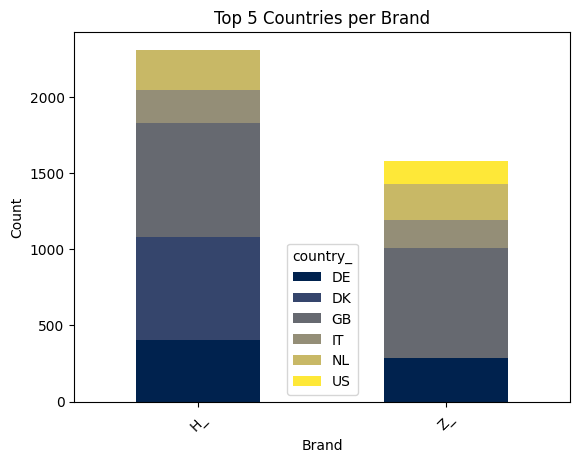

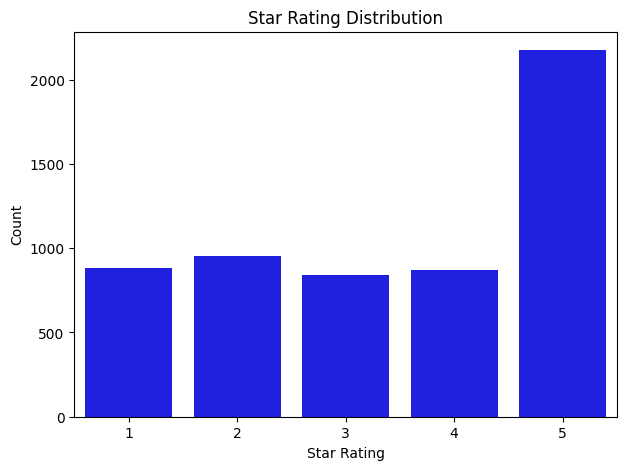

<ipython-input-12-17bd64733436>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=predicted_emotions_counts.index, y=predicted_emotions_counts.values, palette="magma")


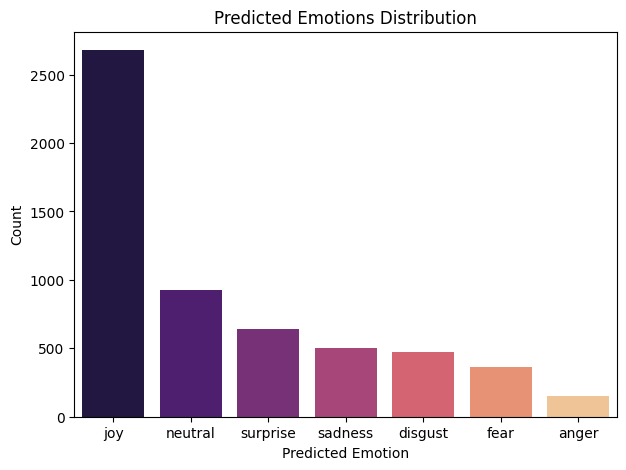

,star_rating_
count,5722.000000
mean,3.437085
std,1.505328
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_excel('/content/predicted_emotions (1).xlsx')

# Frequency count for categorical columns
brand_counts = data['brand_name_'].value_counts()
predicted_emotions_counts = data['predicted_emotions'].value_counts()
star_rating_counts = data['star_rating_'].value_counts().sort_index()
top_countries_per_brand = data.groupby('brand_name_')['country_'].value_counts().groupby(level=0).nlargest(5).reset_index(level=0, drop=True)

# Brand distribution
plt.figure(figsize=(7, 5))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="viridis")
plt.title('Brand Distribution')
plt.ylabel('Count')
plt.xlabel('Brand')
plt.show()

# Country distribution top 5 per brand
plt.figure(figsize=(7, 5))
top_countries_per_brand.unstack().plot(kind='bar', stacked=True, colormap='cividis')
plt.title('Top 5 Countries per Brand')
plt.ylabel('Count')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.show()

# Star rating distribution
plt.figure(figsize=(7, 5))
sns.barplot(x=star_rating_counts.index, y=star_rating_counts.values, color='blue')
plt.title('Star Rating Distribution')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

# Predicted emotions distribution
plt.figure(figsize=(7, 5))
sns.barplot(x=predicted_emotions_counts.index, y=predicted_emotions_counts.values, palette="magma")
plt.title('Predicted Emotions Distribution')
plt.ylabel('Count')
plt.xlabel('Predicted Emotion')
plt.show()

# Output descriptive statistics
descriptive_stats = data.describe()
descriptive_stats


**Relationship Between Star Rating and Brand**

<ipython-input-10-2139660eba52>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='brand_name_', y='star_rating_', data=data, palette="Set3")


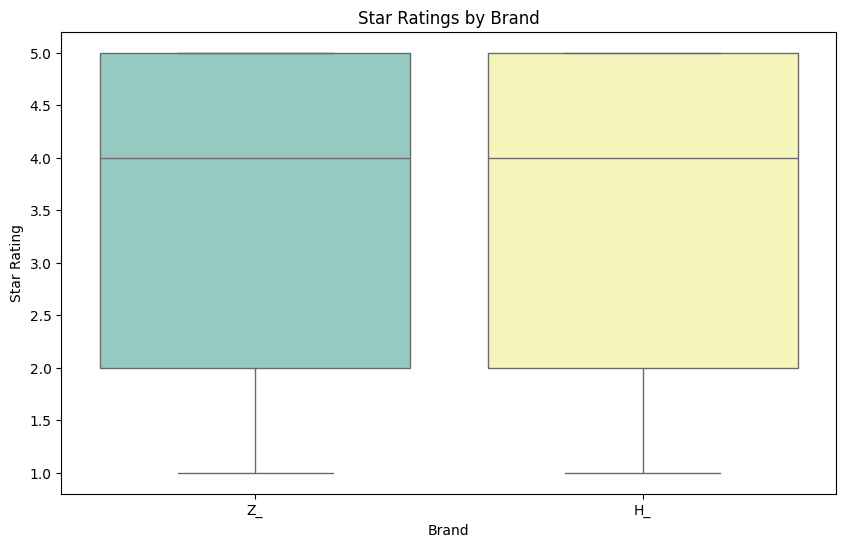

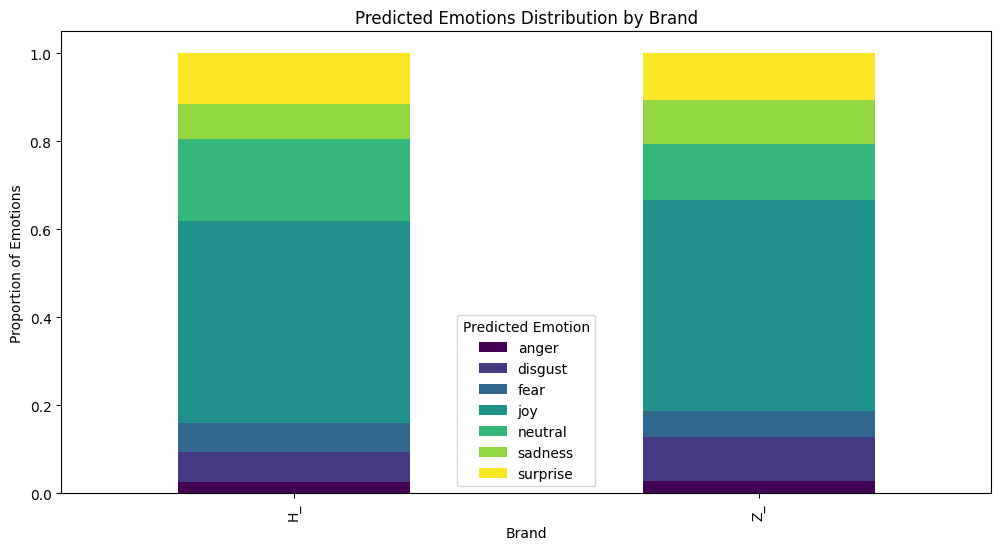

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your data
data = pd.read_excel('/content/predicted_emotions.xlsx')

# Boxplot for star ratings by brand
plt.figure(figsize=(10, 6))
sns.boxplot(x='brand_name_', y='star_rating_', data=data, palette="Set3")
plt.title('Star Ratings by Brand')
plt.xlabel('Brand')
plt.ylabel('Star Rating')
plt.show()

# Normalized stacked bar chart for predicted emotions by brand
emotions_by_brand = pd.crosstab(data['brand_name_'], data['predicted_emotions'], normalize='index')
emotions_by_brand.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
plt.title('Predicted Emotions Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Proportion of Emotions')
plt.legend(title='Predicted Emotion')
plt.show()


**Relation Between Star Rating and Emotion**

<ipython-input-1-5d5140bb6245>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='predicted_emotions', y='star_rating_', data=data, palette="Set3")


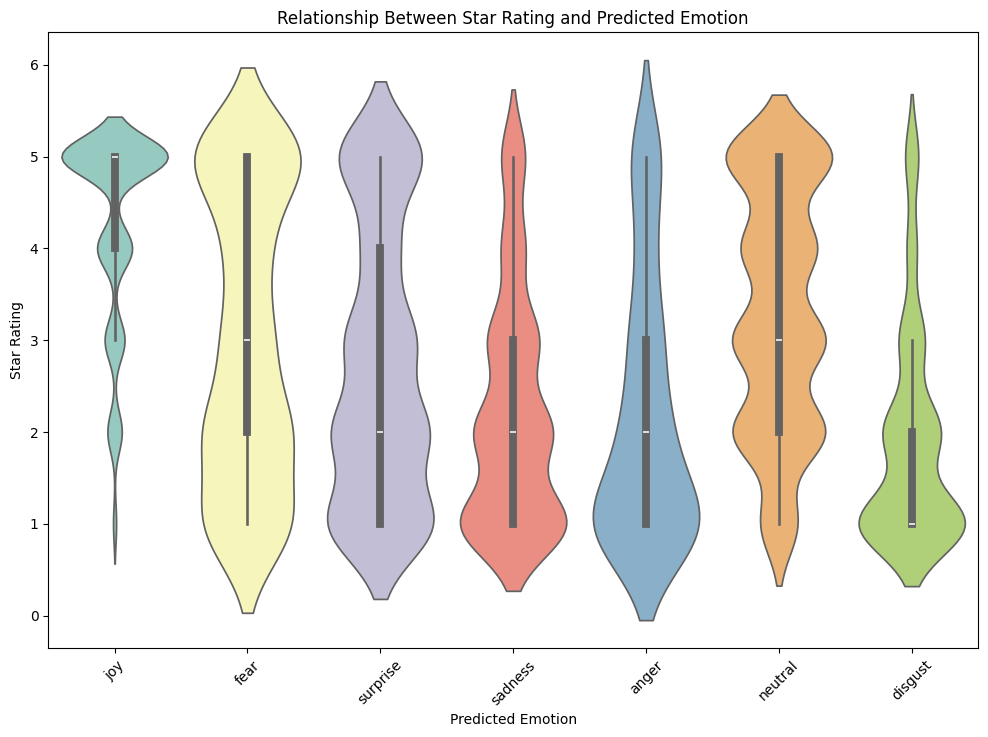

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data = pd.read_excel('/content/predicted_emotions (1).xlsx')  # replace with your file path

# Create a violin plot to study the relationship between star rating and emotion
plt.figure(figsize=(12, 8))
sns.violinplot(x='predicted_emotions', y='star_rating_', data=data, palette="Set3")
plt.title('Relationship Between Star Rating and Predicted Emotion')
plt.xlabel('Predicted Emotion')
plt.ylabel('Star Rating')
plt.xticks(rotation=45)
plt.show()


<ipython-input-2-465ce67d3a31>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='brand_name_', y='star_rating_', data=data, ax=axes[0, 0], palette="Set2")


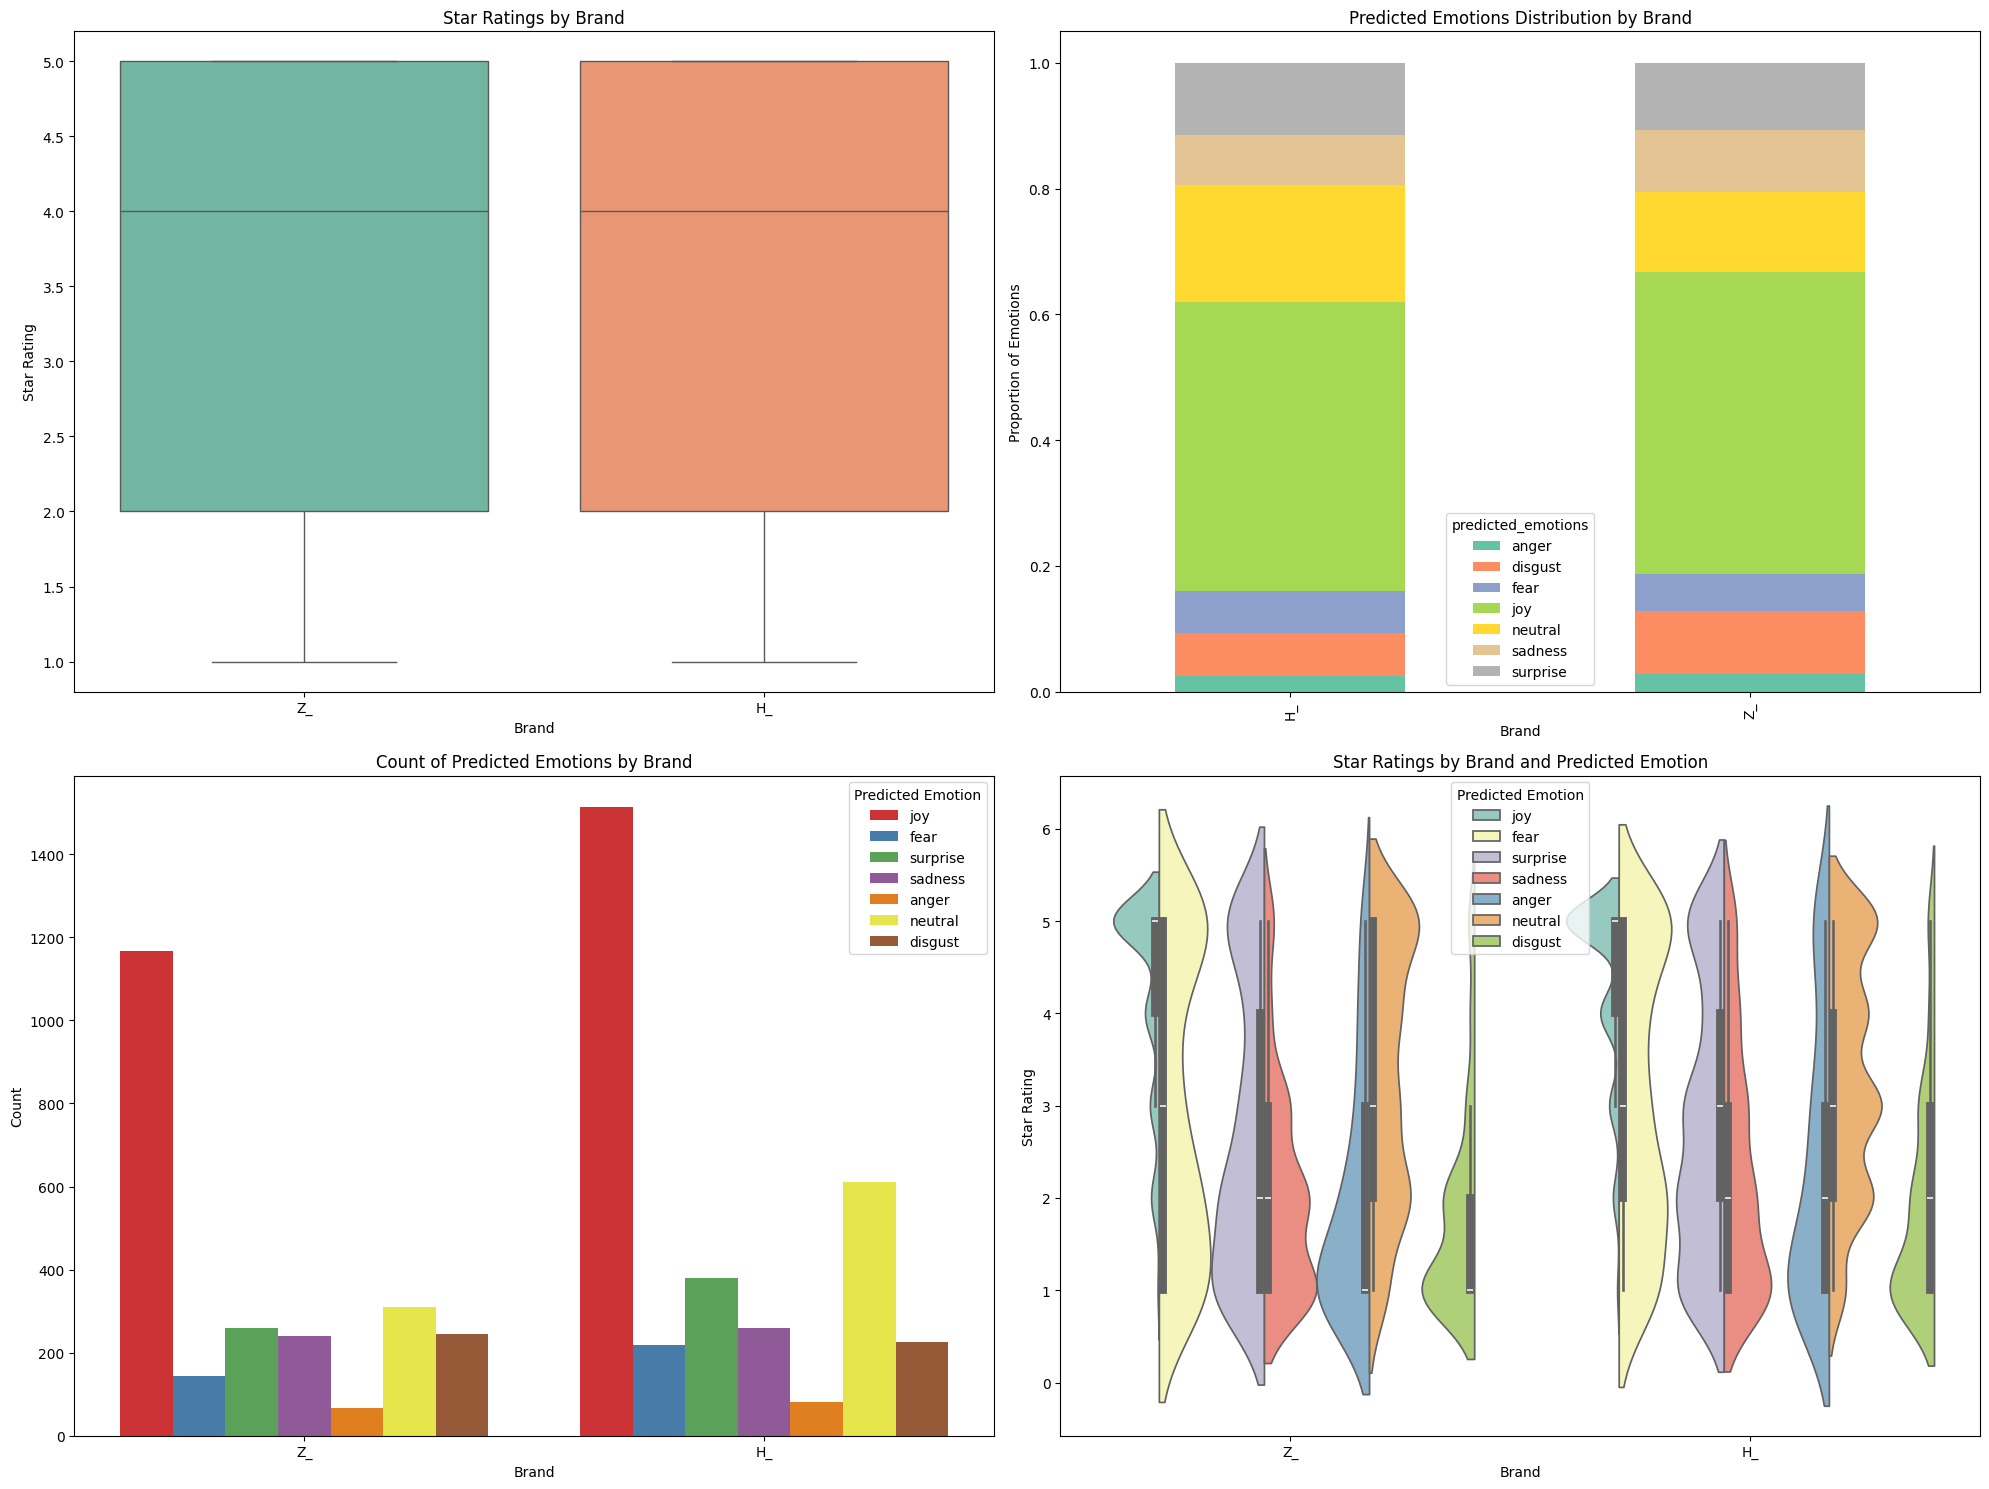

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
data = pd.read_excel('/content/predicted_emotions (1).xlsx')

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Boxplot for star ratings by brand
sns.boxplot(x='brand_name_', y='star_rating_', data=data, ax=axes[0, 0], palette="Set2")
axes[0, 0].set_title('Star Ratings by Brand')
axes[0, 0].set_xlabel('Brand')
axes[0, 0].set_ylabel('Star Rating')

# Normalized stacked bar chart for predicted emotions by brand
emotions_by_brand = pd.crosstab(data['brand_name_'], data['predicted_emotions'], normalize='index')
emotions_by_brand.plot(kind='bar', stacked=True, colormap='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Predicted Emotions Distribution by Brand')
axes[0, 1].set_xlabel('Brand')
axes[0, 1].set_ylabel('Proportion of Emotions')

# Count plot for predicted emotions by brand
sns.countplot(x='brand_name_', hue='predicted_emotions', data=data, ax=axes[1, 0], palette="Set1")
axes[1, 0].set_title('Count of Predicted Emotions by Brand')
axes[1, 0].set_xlabel('Brand')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Predicted Emotion')

# Violin plot for star ratings by brand and emotion
sns.violinplot(x='brand_name_', y='star_rating_', hue='predicted_emotions', data=data, split=True, ax=axes[1, 1], palette="Set3")
axes[1, 1].set_title('Star Ratings by Brand and Predicted Emotion')
axes[1, 1].set_xlabel('Brand')
axes[1, 1].set_ylabel('Star Rating')
axes[1, 1].legend(title='Predicted Emotion')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


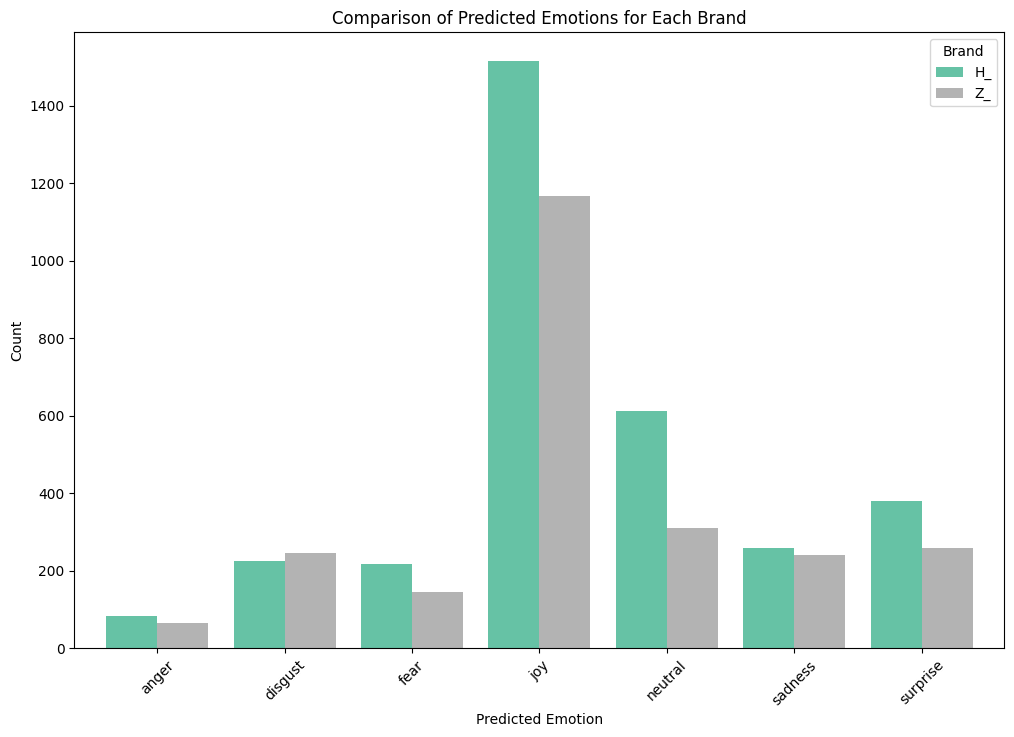

In [ ]:
# Load the dataset
data = pd.read_excel('/content/predicted_emotions (1).xlsx')  # Update with your file path

# Creating a crosstab for predicted emotions by brand for side-by-side comparison
emotion_counts_by_brand = pd.crosstab(data['predicted_emotions'], data['brand_name_'])

# Plotting the side-by-side double bar graph for each emotion across both brands
emotion_counts_by_brand.plot(kind='bar', figsize=(12, 8), width=0.8, colormap='Set2')
plt.title('Comparison of Predicted Emotions for Each Brand')
plt.xlabel('Predicted Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Brand')
plt.show()